In [1]:
from lines_utils import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

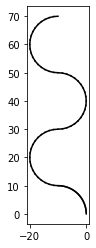

In [3]:
lines=make_curve(90, 10, start_point=[0,0],n_lines=30,left=True)
ax=plt.gca()
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,10],n_lines=20,left=False,start_degree=90)
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,30],n_lines=20,left=True,start_degree=270)
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,50],n_lines=20,left=False,start_degree=90)
for l in lines:
    l.draw(ax)
    
ax.set_aspect('equal', adjustable='box')